# Health Aalysis

## Importing Relevant Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the data

In [3]:
df=pd.read_csv(r'C:\Users\User\Development\Washington\Health_Analysis\cema_internship_task_2023.csv')
df.head()

,period,county,Total Dewormed,Acute Malnutrition,stunted 6-23 months,stunted 0-<6 months,stunted 24-59 months,diarrhoea cases,Underweight 0-<6 months,Underweight 6-23 months,Underweight 24-59 Months
0,Jan-23,Baringo County,3659,8.0,471.0,34.0,380.0,2620,85,739.0,731.0
1,Jan-23,Bomet County,1580,NaN,1.0,3.0,NaN,1984,41,86.0,16.0
2,Jan-23,Bungoma County,6590,24.0,98.0,154.0,23.0,4576,231,315.0,120.0
3,Jan-23,Busia County,7564,NaN,396.0,143.0,111.0,2239,251,608.0,125.0
4,Jan-23,Elgeyo Marakwet County,1407,NaN,92.0,71.0,5.0,2739,57,104.0,21.0


## Check details of DataFrame

In [11]:
df.shape # Check the shape of the DataFrame

(1410, 11)

In [21]:
df.describe().round(0)

,Total Dewormed,Acute Malnutrition,stunted 6-23 months,stunted 0-<6 months,stunted 24-59 months,diarrhoea cases,Underweight 0-<6 months,Underweight 6-23 months,Underweight 24-59 Months
count,1410.0,1055.0,1399.0,1391.0,1396.0,1410.0,1410.0,1410.0,1410.0
mean,11458.0,125.0,280.0,140.0,111.0,2813.0,223.0,652.0,306.0
std,25372.0,266.0,381.0,280.0,193.0,2162.0,229.0,670.0,538.0
min,97.0,1.0,1.0,1.0,1.0,198.0,6.0,16.0,1.0
25%,2454.0,15.0,70.0,36.0,22.0,1464.0,87.0,249.0,51.0
50%,4564.0,39.0,159.0,84.0,50.0,2158.0,162.0,456.0,120.0
75%,8222.0,144.0,328.0,157.0,114.0,3335.0,273.0,792.0,311.0
max,392800.0,4123.0,4398.0,7900.0,3169.0,15795.0,1937.0,5348.0,4680.0


## Check null values

In [6]:
df.isnull().sum() # Check for missing values

period                        0
county                        0
Total Dewormed                0
Acute Malnutrition          355
stunted 6-23 months          11
stunted 0-<6 months          19
stunted 24-59 months         14
diarrhoea cases               0
Underweight 0-<6 months       0
Underweight 6-23 months       0
Underweight 24-59 Months      0
dtype: int64

In [7]:
df.columns # List all column names

Index(['period', 'county', 'Total Dewormed', 'Acute Malnutrition',
       'stunted 6-23 months', 'stunted 0-<6 months', 'stunted 24-59 months',
       'diarrhoea cases', 'Underweight 0-<6 months', 'Underweight 6-23 months',
       'Underweight 24-59 Months'],
      dtype='object')

## Dealing with Null values

In [22]:
df.isna().sum() # Check for null values in each column

period                        0
county                        0
Total Dewormed                0
Acute Malnutrition          355
stunted 6-23 months          11
stunted 0-<6 months          19
stunted 24-59 months         14
diarrhoea cases               0
Underweight 0-<6 months       0
Underweight 6-23 months       0
Underweight 24-59 Months      0
dtype: int64

In [23]:
# To identify the numeric columns to fill null values with median
numeric_cols = df.select_dtypes(include='number').columns

In [25]:
# Fill null values in numeric columns with median
df[numeric_cols] = df.groupby('county')[numeric_cols].transform(
    lambda x: x.fillna(x.median()))

In [26]:
print(df.isna().sum())

period                       0
county                       0
Total Dewormed               0
Acute Malnutrition          90
stunted 6-23 months          0
stunted 0-<6 months          0
stunted 24-59 months         0
diarrhoea cases              0
Underweight 0-<6 months      0
Underweight 6-23 months      0
Underweight 24-59 Months     0
dtype: int64


In [27]:
# To check the counties with missing numbers on 'Acute Malnutrition' before filling(median is zero because they have no values)
missing_am = df[df['Acute Malnutrition'].isna()]
missing_am['county'].value_counts()



county
Elgeyo Marakwet County    30
Kericho County            30
Lamu County               30
Name: count, dtype: int64

In [28]:
# Filling remaining nulls using National median
df['Acute Malnutrition'] = df['Acute Malnutrition'].fillna(
    df['Acute Malnutrition'].median())

In [29]:
print(df['Acute Malnutrition'].isna().sum())

0


In [30]:
print(df.isna().sum())

period                      0
county                      0
Total Dewormed              0
Acute Malnutrition          0
stunted 6-23 months         0
stunted 0-<6 months         0
stunted 24-59 months        0
diarrhoea cases             0
Underweight 0-<6 months     0
Underweight 6-23 months     0
Underweight 24-59 Months    0
dtype: int64


## Understanding spread and outliers

In [31]:
# Using box plots to visualize distributions of numerical features
numerical_features = ['Total Dewormed', 'Acute Malnutrition',
       'stunted 6-23 months', 'stunted 0-<6 months', 'stunted 24-59 months',
       'diarrhoea cases', 'Underweight 0-<6 months', 'Underweight 6-23 months',
       'Underweight 24-59 Months'] # All the columns except 'period' and 'county'

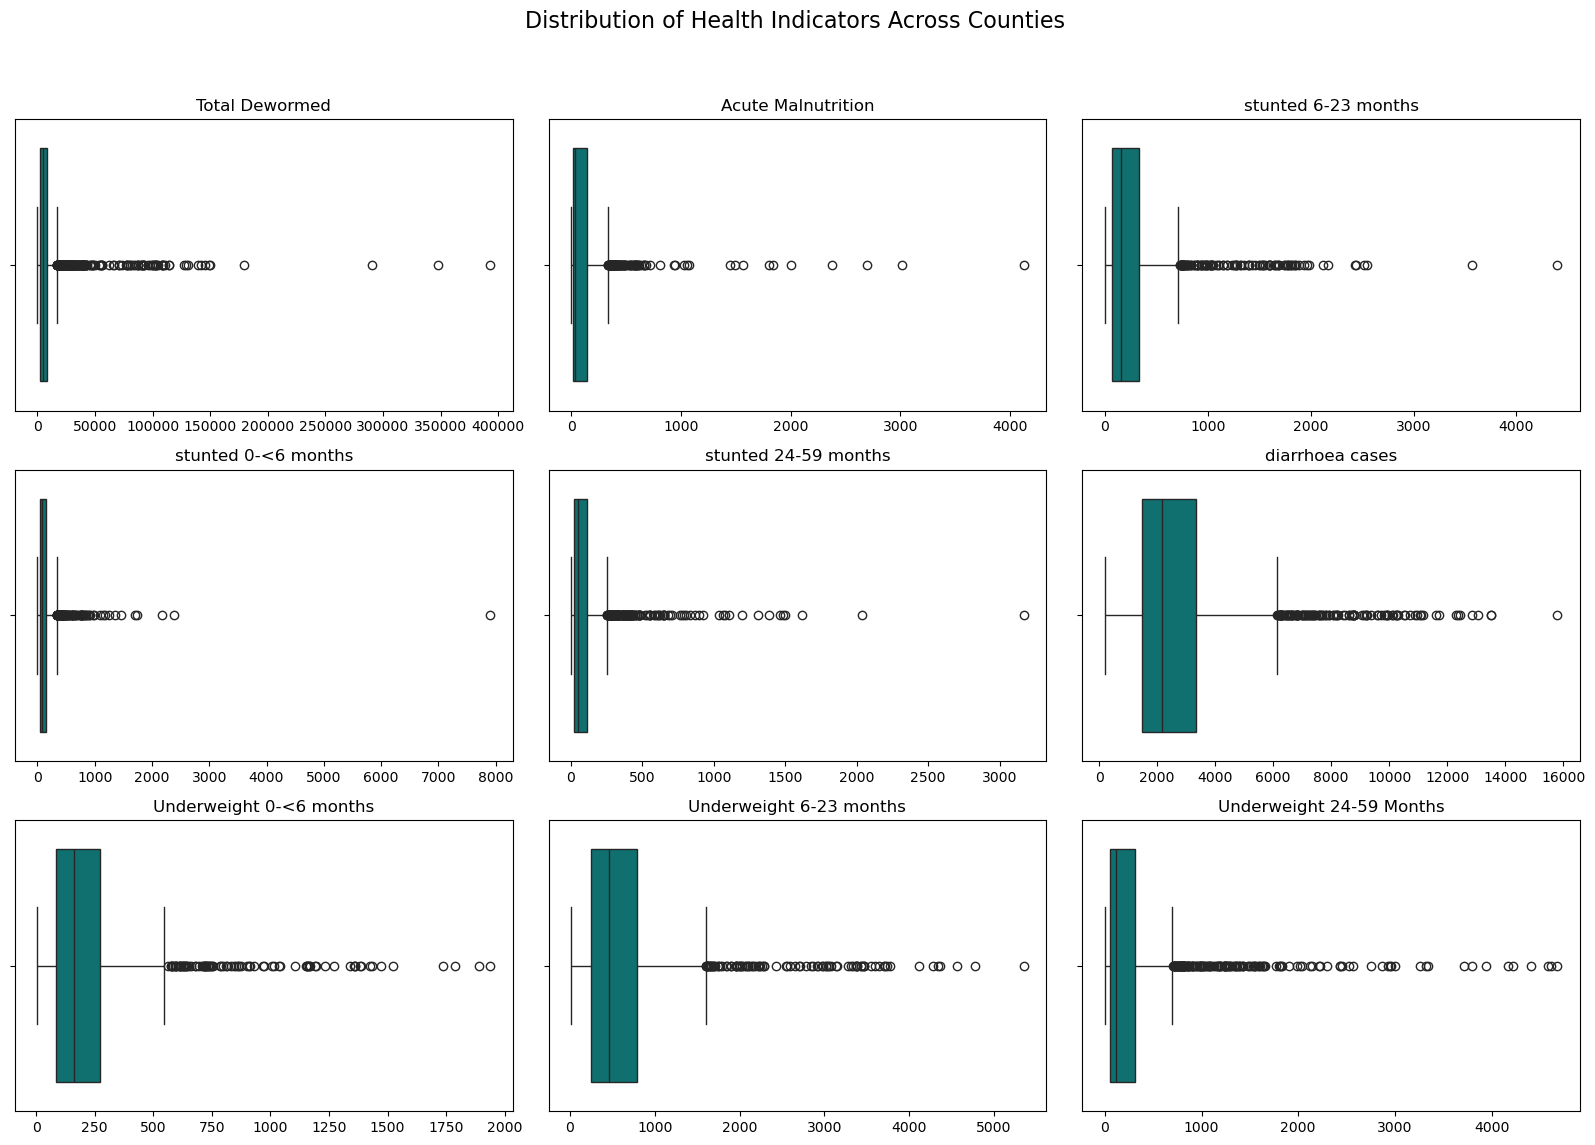

In [17]:
# Breaking down the box plots for better visibility
# Selecting only numeric columns
indicators= ['Total Dewormed', 'Acute Malnutrition',
       'stunted 6-23 months', 'stunted 0-<6 months', 'stunted 24-59 months',
       'diarrhoea cases', 'Underweight 0-<6 months', 'Underweight 6-23 months',
       'Underweight 24-59 Months']
# Creating subplots grid
rows=3
cols=3
plt.figure(figsize=(16,12))

for i,col in enumerate(indicators,start=1):
    plt.subplot(rows,cols,i)
    sns.boxplot(data=df,x=col,color='teal')
    plt.title(col)
    plt.xlabel('')

plt.suptitle('Distribution of Health Indicators Across Counties', fontsize=16)
plt.tight_layout(rect=[0,0.03,1,0.95]) 
plt.show()

## Visualizing data

C:\Users\User\AppData\Local\Temp\ipykernel_19092\3274958086.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_mal.values, y=avg_mal.index, palette='mako')


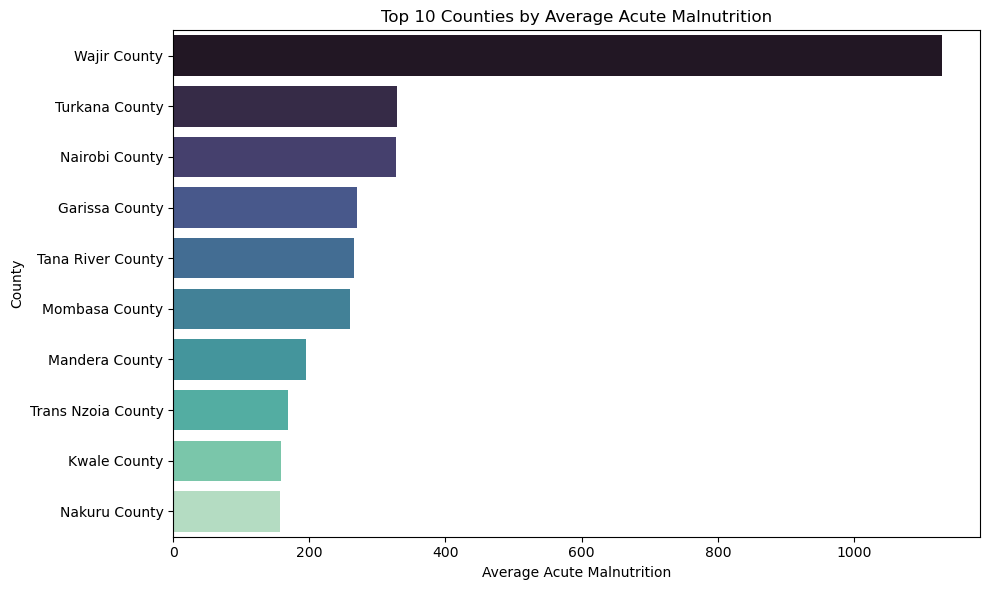

In [32]:
# Top 10 counties by average Acute Malnutrition
avg_mal = df.groupby('county')['Acute Malnutrition'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_mal.values, y=avg_mal.index, palette='mako')
plt.title("Top 10 Counties by Average Acute Malnutrition")
plt.xlabel("Average Acute Malnutrition")
plt.ylabel("County")
plt.tight_layout()
plt.show()

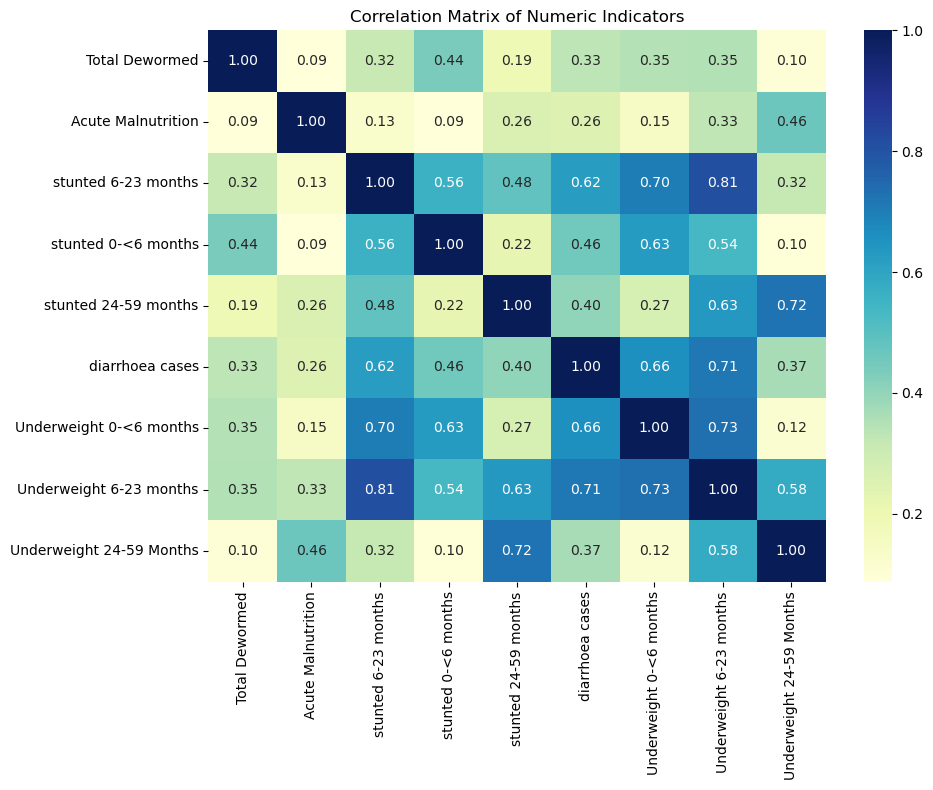

In [34]:
# Correlation Heatmap among indicators
corr = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Matrix of Numeric Indicators")
plt.tight_layout()
plt.show()

In [35]:
df.to_csv("cleaned_health_data.csv", index=False) # Save cleaned data to a new CSV file

In [40]:
df2=pd.read_csv(r"C:\Users\User\Development\Washington\Health_Analysis\cleaned_health_data.csv")
df2.head()

,period,county,Total Dewormed,Acute Malnutrition,stunted 6-23 months,stunted 0-<6 months,stunted 24-59 months,diarrhoea cases,Underweight 0-<6 months,Underweight 6-23 months,Underweight 24-59 Months
0,2025-01-23,Baringo County,3659,8.0,471,34.0,380.0,2620,85,739.0,731.0
1,2025-01-23,Bomet County,1580,1.5,1,3.0,5.0,1984,41,86.0,16.0
2,2025-01-23,Bungoma County,6590,24.0,98,154.0,23.0,4576,231,315.0,120.0
3,2025-01-23,Busia County,7564,2.0,396,143.0,111.0,2239,251,608.0,125.0
4,2025-01-23,Elgeyo Marakwet County,1407,26.0,92,71.0,5.0,2739,57,104.0,21.0


In [41]:
df2.columns=df2.columns.str.strip() # Clean trailing spaces in column names

In [ ]:
df2['period_parsed'] = pd.to_datetime(df2['period'], errors='coerce')

print("Parsed date sample:")
display(df2[['period', 'period_parsed']].head())

print(f"\nDate Range: {df2['period_parsed'].min()} → {df2['period_parsed'].max()}") # To convert period to datetime

Parsed date sample:


,period,period_parsed
0,2025-01-23,2025-01-23
1,2025-01-23,2025-01-23
2,2025-01-23,2025-01-23
3,2025-01-23,2025-01-23
4,2025-01-23,2025-01-23



Date Range: 2025-01-21 00:00:00 → 2025-12-22 00:00:00


In [ ]:
exclude_cols = ['period', 'county', 'period_parsed']
numeric_cols = [col for col in df2.columns if col not in exclude_cols and 
                pd.api.types.is_numeric_dtype(df2[col])]

print("\nFound Numeric Health Indicators:\n", numeric_cols) # To identify numeric columns(health indicators)


Found Numeric Health Indicators:
 ['Total Dewormed', 'Acute Malnutrition', 'stunted 6-23 months', 'stunted 0-<6 months', 'stunted 24-59 months', 'diarrhoea cases', 'Underweight 0-<6 months', 'Underweight 6-23 months', 'Underweight 24-59 Months']


In [ ]:
national = df2.groupby('period_parsed')[numeric_cols].sum().sort_index().reset_index()

print("\nNational Trend Data Preview:")
display(national.head()) # Aggregting monthly totals nationally



National Trend Data Preview:


,period_parsed,Total Dewormed,Acute Malnutrition,stunted 6-23 months,stunted 0-<6 months,stunted 24-59 months,diarrhoea cases,Underweight 0-<6 months,Underweight 6-23 months,Underweight 24-59 Months
0,2025-01-21,186487,1803.5,7520,4520.0,2257.0,94327,6633,15528.0,8941.0
1,2025-01-22,217187,2851.0,12321,6106.0,3683.0,152593,9685,26759.0,10972.0
2,2025-01-23,232247,4979.0,16079,6316.0,6492.0,147067,10879,38666.0,19368.0
3,2025-02-21,196730,2579.5,8311,5087.0,2471.0,119174,7950,20371.0,7399.0
4,2025-02-22,246945,6007.0,10930,5688.0,3717.0,133726,9937,27301.0,11272.0


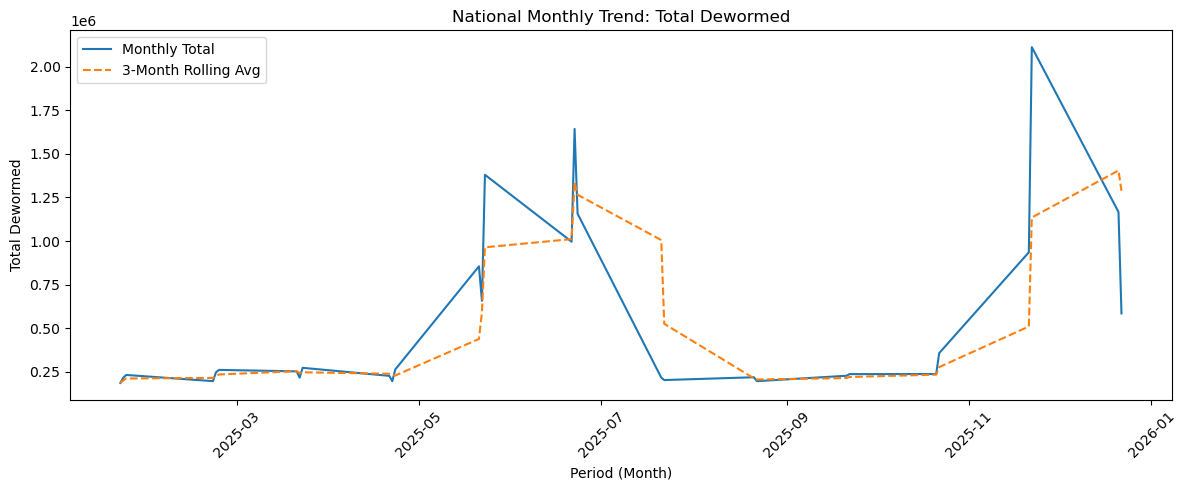

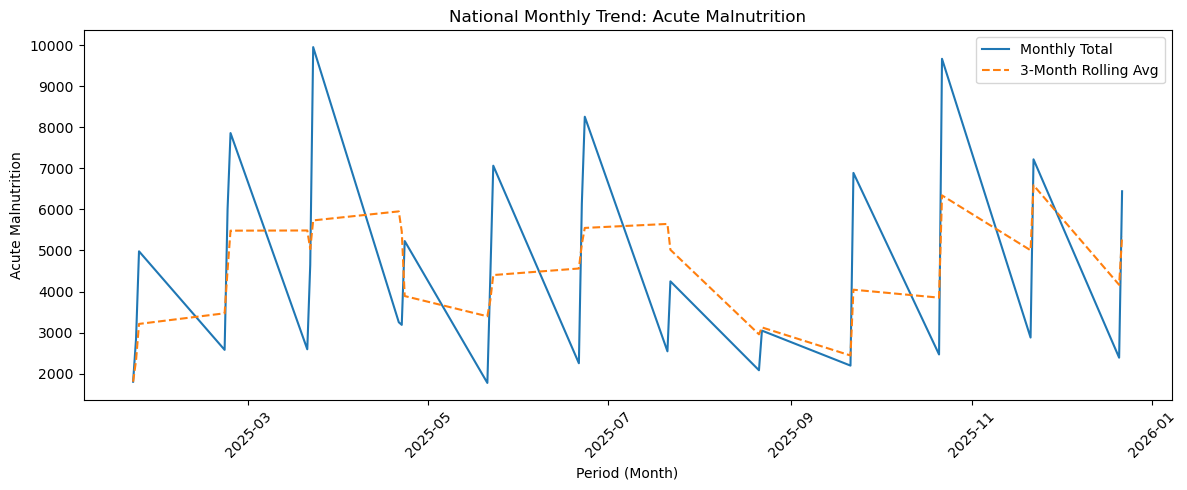

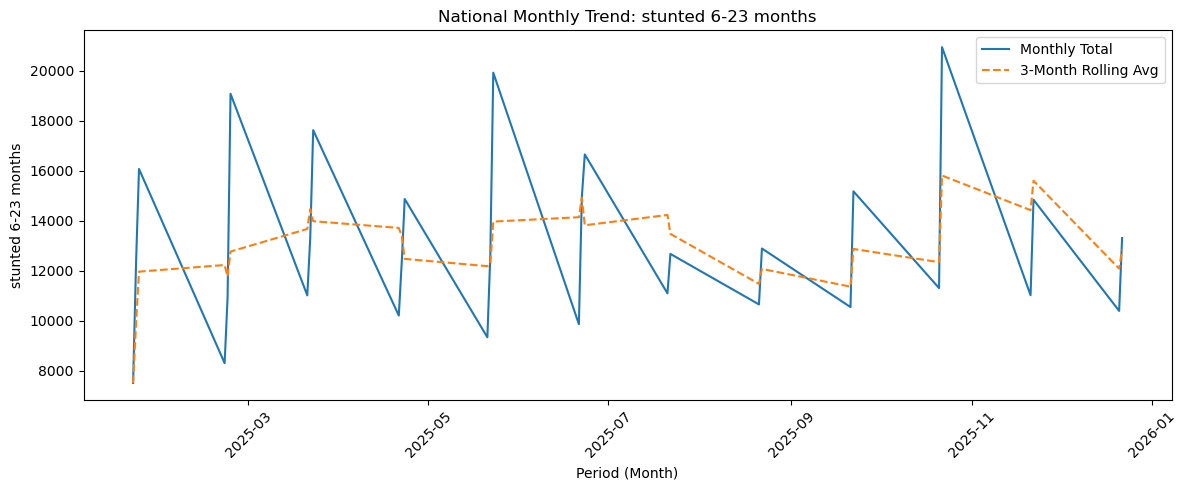

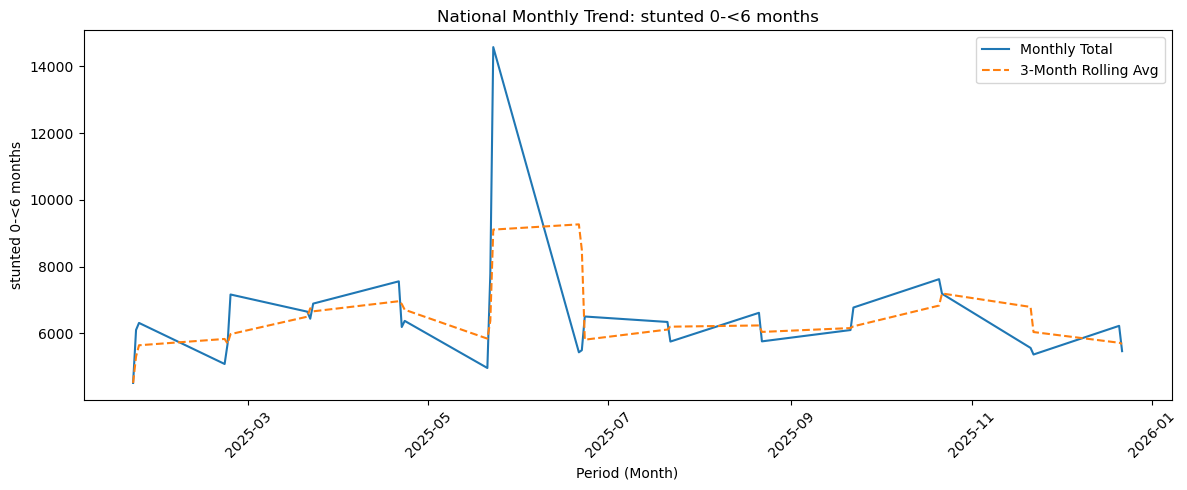

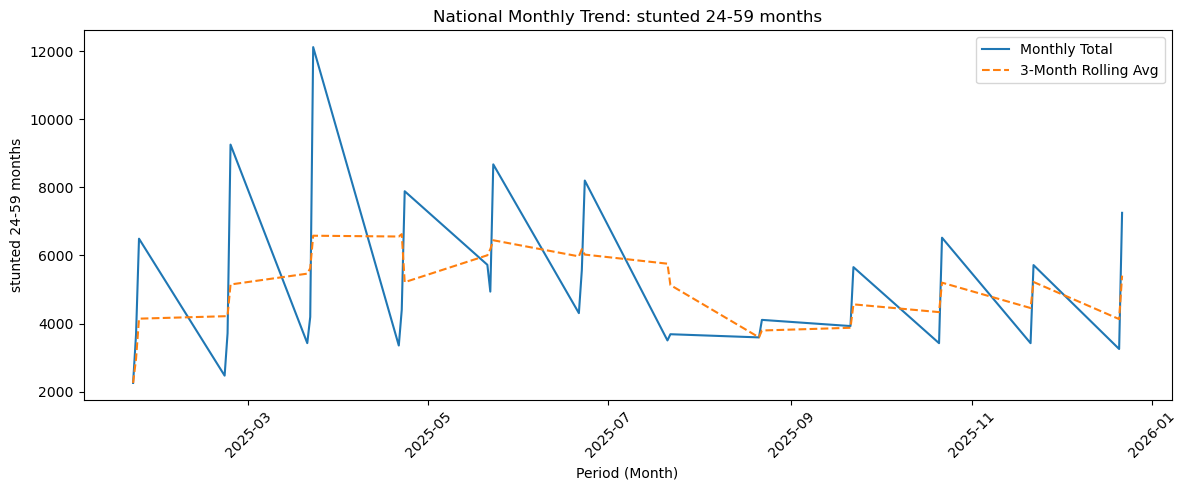

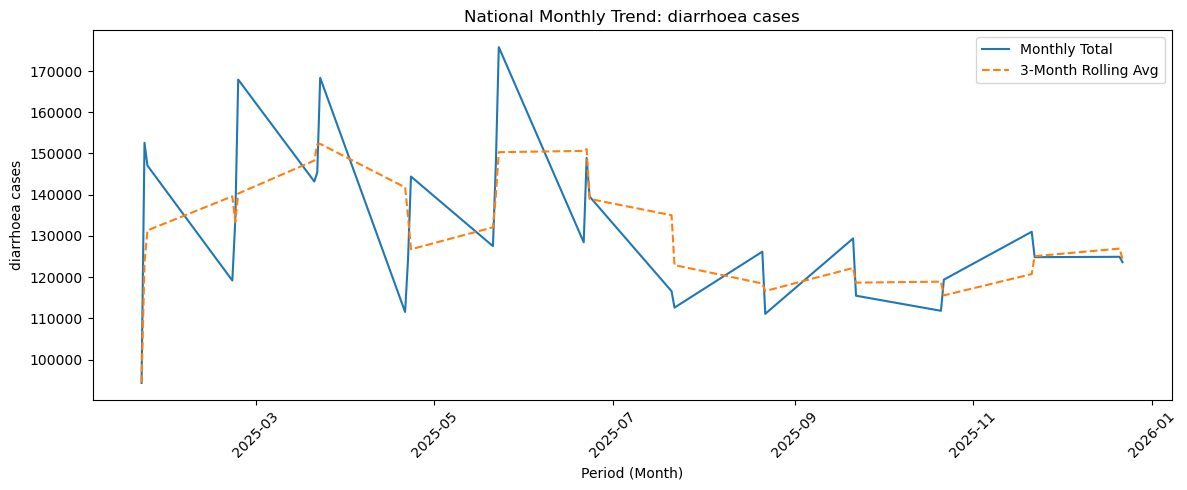

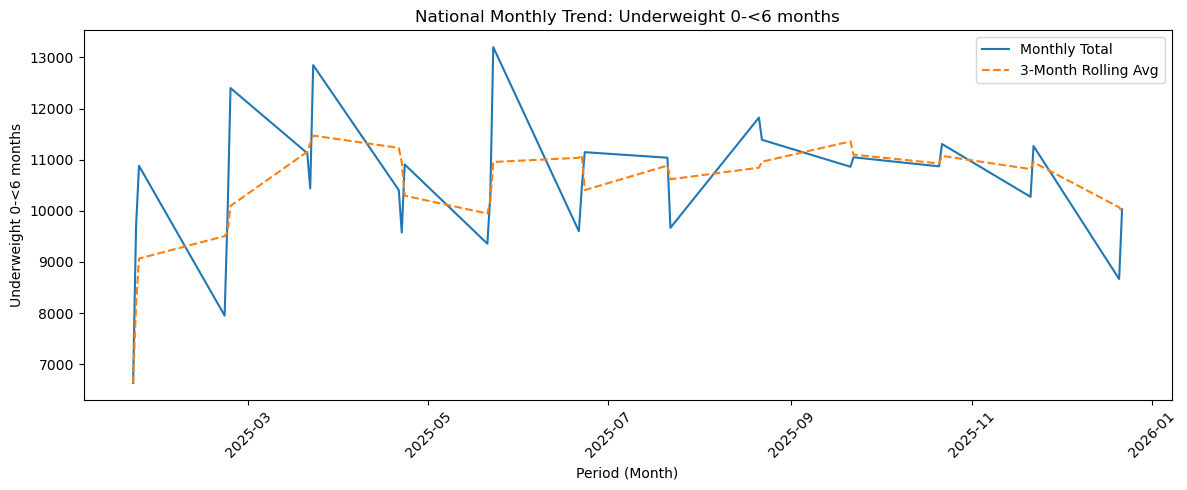

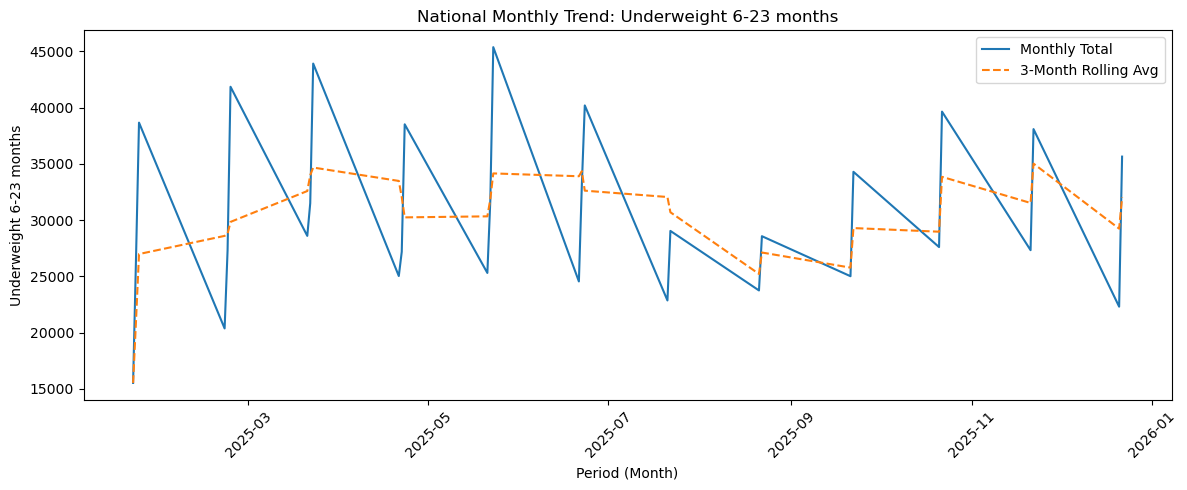

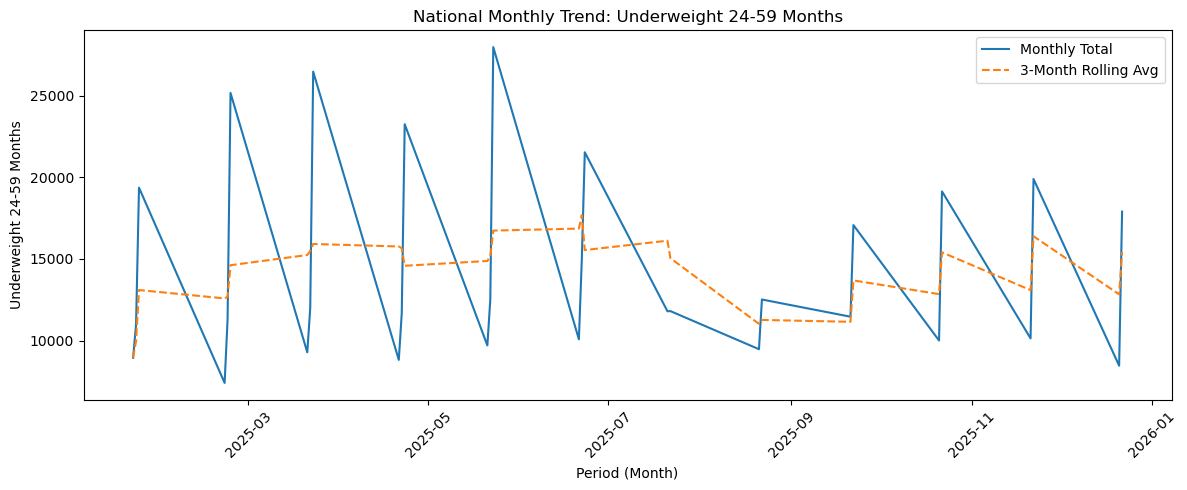

In [ ]:
# Plot each indicator in a different time series to visualize national trends
for col in numeric_cols:
    plt.figure(figsize=(12, 5))
    plt.plot(national['period_parsed'], national[col], label="Monthly Total")
    
    # Rolling average to smooth trends
    rolling = national[col].rolling(3, min_periods=1).mean()
    plt.plot(national['period_parsed'], rolling, linestyle='--', label="3-Month Rolling Avg")
    
    plt.title(f"National Monthly Trend: {col}")
    plt.xlabel("Period (Month)")
    plt.ylabel(col)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

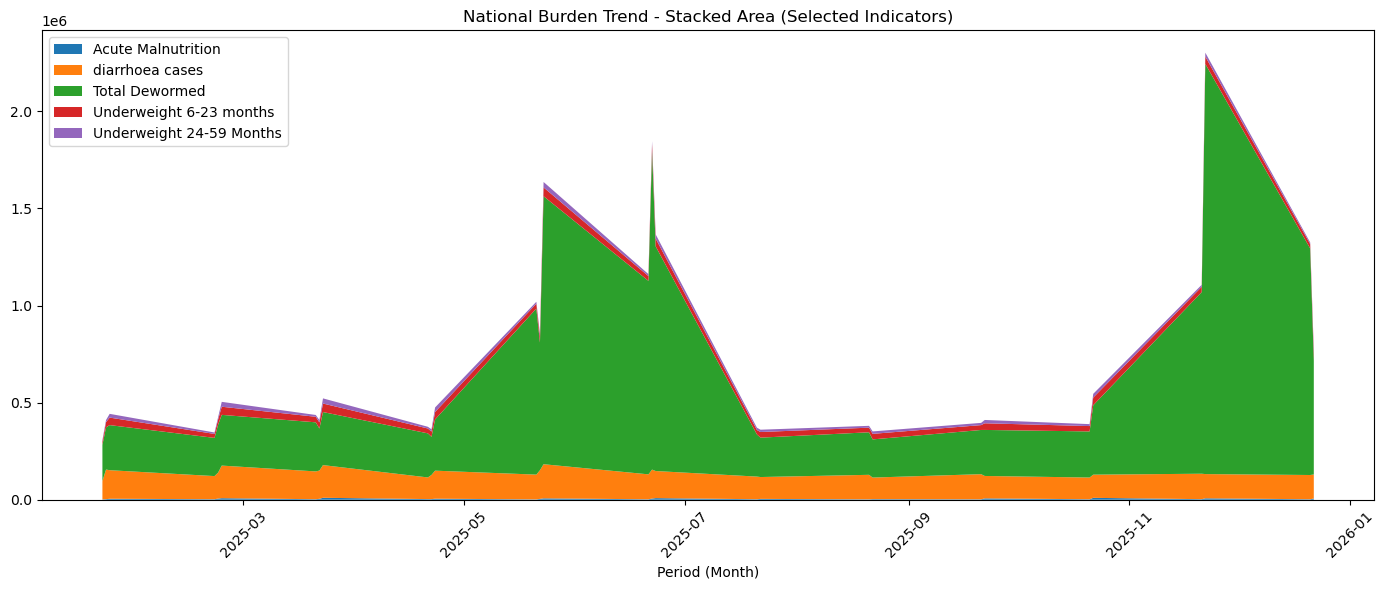

In [53]:
subset = ['Acute Malnutrition', 'diarrhoea cases', 'Total Dewormed',
          'Underweight 6-23 months', 'Underweight 24-59 Months']
subset = [col for col in subset if col in numeric_cols]

plt.figure(figsize=(14, 6))
plt.stackplot(national['period_parsed'], [national[col] for col in subset], labels=subset)
plt.title("National Burden Trend - Stacked Area (Selected Indicators)")
plt.xlabel("Period (Month)")
plt.legend(loc="upper left")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Conclusion

In [ ]:
# The missing data points to data collection weaknesses in the Health Sector. Focus should be on improcing the health data systems for the counties with significant missing data.
# Boxplot analysis showed that some counties had extremely high values for certain health indicators, indicating potential health crises or data anomalies that need further investigation.
# The top counties with high average Acute Malnutrition rates should be prioritized for nutritional interventions and resource allocation to address malnutrition effectively.